

# ⚙️ **Student Performance Prediction**

### **Topic:** *Data Preprocessing, Encoding & Feature Scaling*

### **Dataset (Kaggle):**

📎 https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

---

## **📝 Problem Statement**

Build a model that predicts a student’s **math score** based on demographic and academic performance features.

The main focus is **cleaning, encoding, and feature scaling**, not model complexity.

You will create a **Streamlit/Gradio GUI** where the user enters student details and gets a predicted math score.


---

## **📚 Project Overview**

You will work with a student performance dataset containing gender, ethnicity, parental education level, lunch type, test preparation course, and exam scores.

After preprocessing and scaling, you’ll train a regression model (Linear Regression or Random Forest Regressor) and deploy a GUI for predictions.

---

## **🧩 Project Flow**

---

## **1. Import & Understand Dataset**

- Load data with pandas
- Explore columns:
    - Gender
    - Race/Ethnicity
    - Parental education
    - Lunch
    - Test preparation
    - Reading score
    - Writing score
    - Math score (target)
- Check for missing values
- Identify categorical vs numerical features

---

## **2. Data Cleaning**

- Fix inconsistent labels (e.g., formatting)
- Handle missing values (mean/median for numerics, mode for categoricals)
- Detect outliers (boxplot) — optional

---

## **3. Encoding Categorical Variables**

- Apply **Label Encoding** for binary columns
- Apply **OneHotEncoding** for multi-category columns

---

## **4. Feature Scaling**

Use one of the following scalers:

- **StandardScaler**
- **MinMaxScaler**

Scale all numerical columns:

- reading score
- writing score
- parental education score (after mapping if needed)

Create a **preprocessing pipeline** that includes encoding + scaling.

---

## **5. Train & Evaluate Model**

Choose a simple regression model:

- Linear Regression
- Random Forest Regressor

Metrics to compute:

- R² Score
- MAE
- RMSE

---

## **6. Save Model & Preprocessing Pipeline**

- Save vectorizer/encoder
- Save scaler
- Save trained model
    
    (using joblib)
    

---

## **7. Build the GUI (Gradio)**

### **User Inputs (form fields):**

- Gender
- Ethnicity group
- Parental education level
- Lunch type
- Test preparation course
- Reading score
- Writing score

### **GUI Output:**

- Predicted **Math Score**
- Optional: Show input scaled values
- Optional: Show which features influence score

---

## **8. Run the App**

- Gradio: `gr.Interface()`

---

## **9. Project Deliverables**

- EDA + preprocessing notebook
- Preprocessing pipeline diagram
- Saved model + encoders + scalers
- GUI for student score prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['math score', 'reading score', 'writing score']
Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
for col in categorical_features:
    print(f"Column '{col}': {df[col].unique()}\n")

Column 'gender': ['female' 'male']

Column 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']

Column 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Column 'lunch': ['standard' 'free/reduced']

Column 'test preparation course': ['none' 'completed']



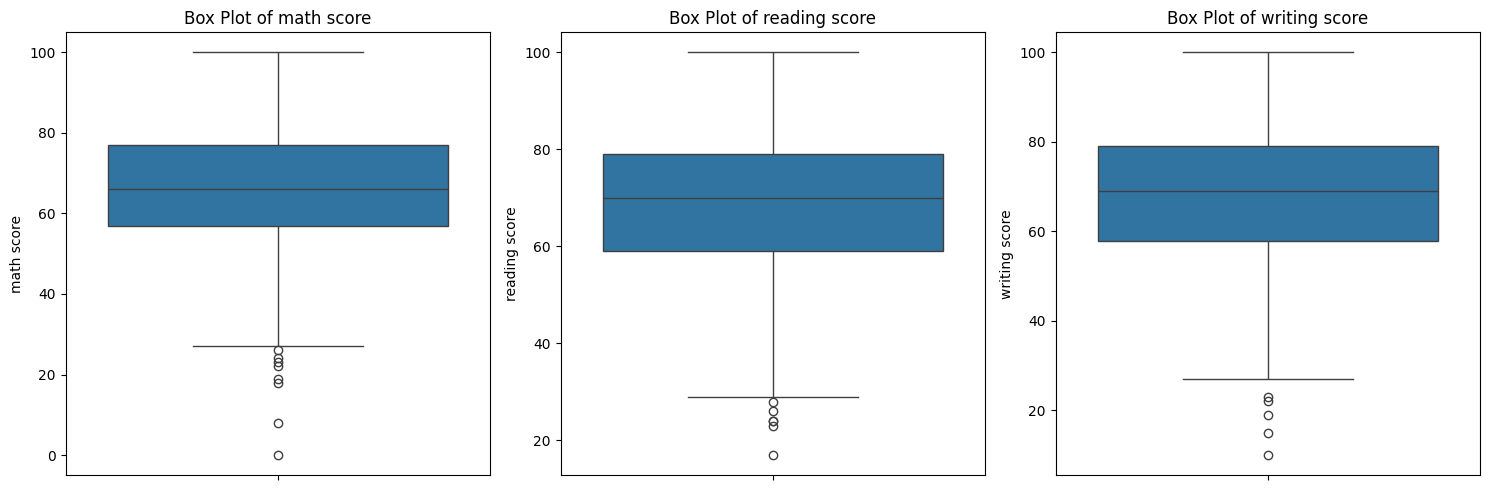

In [ ]:
#Box Plot
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
print("Label Encoding applied to 'gender', 'lunch', and 'test preparation course' columns.")
print(df[['gender', 'lunch', 'test preparation course']].head())

Label Encoding applied to 'gender', 'lunch', and 'test preparation course' columns.
   gender  lunch  test preparation course
0       0      1                        1
1       0      1                        0
2       0      1                        1
3       1      0                        1
4       1      1                        1


In [ ]:
df = pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education'], drop_first=True)
print(df.head())

   gender  lunch  test preparation course  math score  reading score  \
0       0      1                        1          72             72   
1       0      1                        0          69             90   
2       0      1                        1          90             95   
3       1      0                        1          47             57   
4       1      1                        1          76             78   

   writing score  race/ethnicity_group B  race/ethnicity_group C  \
0             74                    True                   False   
1             88                   False                    True   
2             93                    True                   False   
3             44                   False                   False   
4             75                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False   
1                   False                   False   

In [ ]:
scaling_features = ['math score', 'reading score', 'writing score']
print("Numerical features identified for scaling:", scaling_features)

Numerical features identified for scaling: ['math score', 'reading score', 'writing score']


In [ ]:
print("Data types of scaling features:")
print(df[scaling_features].dtypes)

Data types of scaling features:
math score       int64
reading score    int64
writing score    int64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_standard = scaler.fit_transform(df[scaling_features])
scaled_standard_col_names = [col + ' (scaled_standard)' for col in scaling_features]
df[scaled_standard_col_names] = df_scaled_standard
print("DataFrame head after applying StandardScaler:")
print(df[scaled_standard_col_names].head())
print(df.head())

DataFrame head after applying StandardScaler:
   math score (scaled_standard)  reading score (scaled_standard)  \
0                      0.390024                         0.193999   
1                      0.192076                         1.427476   
2                      1.577711                         1.770109   
3                     -1.259543                        -0.833899   
4                      0.653954                         0.605158   

   writing score (scaled_standard)  
0                         0.391492  
1                         1.313269  
2                         1.642475  
3                        -1.583744  
4                         0.457333  
   gender  lunch  test preparation course  math score  reading score  \
0       0      1                        1          72             72   
1       0      1                        0          69             90   
2       0      1                        1          90             95   
3       1      0                   

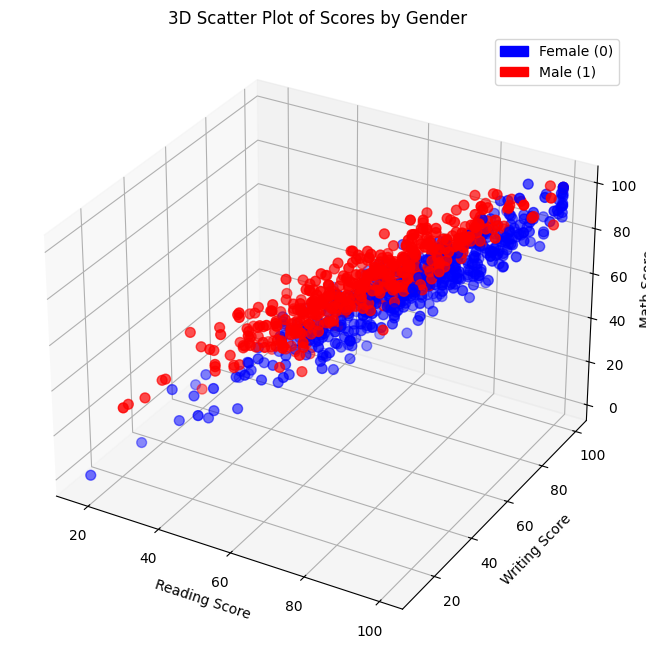

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

gender_colors = df['gender'].map({0: 'blue', 1: 'red'})

ax.scatter(df['reading score'], df['writing score'], df['math score'], c=gender_colors, s=50)

ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')
ax.set_zlabel('Math Score')
ax.set_title('3D Scatter Plot of Scores by Gender')

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Female (0)')
red_patch = mpatches.Patch(color='red', label='Male (1)')
ax.legend(handles=[blue_patch, red_patch])

plt.show()

### Histogram of Math Scores

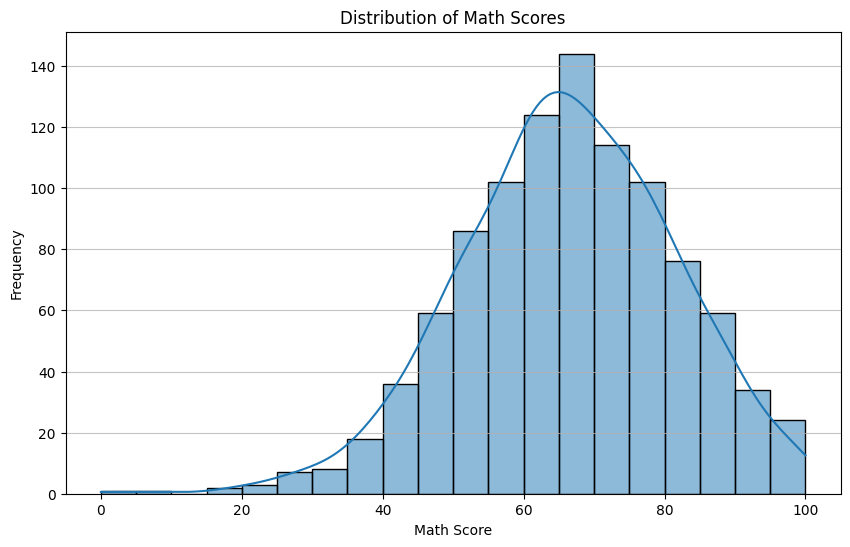

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_scaled_minmax = min_max_scaler.fit_transform(df[scaling_features])
scaled_minmax_col_names = [col + ' (scaled_minmax)' for col in scaling_features]
df[scaled_minmax_col_names] = df_scaled_minmax
print("DataFrame head after applying MinMaxScaler:")
print(df[scaled_minmax_col_names].head())
print(df.head())

DataFrame head after applying MinMaxScaler:
   math score (scaled_minmax)  reading score (scaled_minmax)  \
0                        0.72                       0.662651   
1                        0.69                       0.879518   
2                        0.90                       0.939759   
3                        0.47                       0.481928   
4                        0.76                       0.734940   

   writing score (scaled_minmax)  
0                       0.711111  
1                       0.866667  
2                       0.922222  
3                       0.377778  
4                       0.722222  
   gender  lunch  test preparation course  math score  reading score  \
0       0      1                        1          72             72   
1       0      1                        0          69             90   
2       0      1                        1          90             95   
3       1      0                        1          47             57   
4

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_cols_for_pipeline = ['math score', 'reading score', 'writing score']
categorical_encoded_cols = [col for col in df.columns if col not in numerical_cols_for_pipeline and 'scaled' not in col]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_for_pipeline),
        ('cat', 'passthrough', categorical_encoded_cols)
    ])
df_for_pipeline = df[numerical_cols_for_pipeline + categorical_encoded_cols].copy()
df_transformed_array = preprocessor.fit_transform(df_for_pipeline)
scaled_numerical_col_names_pipeline = [col + ' (scaled_pipeline)' for col in numerical_cols_for_pipeline]
all_transformed_cols = scaled_numerical_col_names_pipeline + categorical_encoded_cols
df_processed_pipeline = pd.DataFrame(df_transformed_array, columns=all_transformed_cols)
print("DataFrame head after applying ColumnTransformer pipeline:")
print(df_processed_pipeline.head())

DataFrame head after applying ColumnTransformer pipeline:
  math score (scaled_pipeline) reading score (scaled_pipeline)  \
0                     0.390024                        0.193999   
1                     0.192076                        1.427476   
2                     1.577711                        1.770109   
3                    -1.259543                       -0.833899   
4                     0.653954                        0.605158   

  writing score (scaled_pipeline)  gender         lunch  \
0                        0.391492  female      standard   
1                        1.313269  female      standard   
2                        1.642475  female      standard   
3                       -1.583744    male  free/reduced   
4                        0.457333    male      standard   

  test preparation course race/ethnicity_group B race/ethnicity_group C  \
0                    none                   True                  False   
1               completed               

In [ ]:
y = df_processed_pipeline['math score (scaled_pipeline)']
X = df_processed_pipeline.drop('math score (scaled_pipeline)', axis=1)

print("First five rows of X:")
print(X.head())
print("\nFirst five values of y:")
print(y.head())

First five rows of X:
  reading score (scaled_pipeline) writing score (scaled_pipeline) gender  \
0                        0.193999                        0.391492      0   
1                        1.427476                        1.313269      0   
2                        1.770109                        1.642475      0   
3                       -0.833899                       -1.583744      1   
4                        0.605158                        0.457333      1   

  lunch test preparation course race/ethnicity_group B race/ethnicity_group C  \
0     1                       1                   True                  False   
1     1                       0                  False                   True   
2     1                       1                   True                  False   
3     0                       1                  False                  False   
4     1                       1                  False                   True   

  race/ethnicity_group D race/ethn

In [ ]:
from sklearn.model_selection import train_test_split
y = y.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 14)
Shape of X_test: (200, 14)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared Score: 0.8804
Mean Absolute Error (MAE): 0.2781
Root Mean Squared Error (RMSE): 0.3559


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Regressor Performance:")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

Random Forest Regressor Performance:
R-squared Score: 0.8497
Mean Absolute Error (MAE): 0.3114
Root Mean Squared Error (RMSE): 0.3991


In [ ]:
import joblib

print("joblib library imported successfully.")

joblib library imported successfully.


In [ ]:
joblib.dump(le, 'label_encoder.joblib')

print("LabelEncoder 'le' saved to 'label_encoder.joblib'.")

LabelEncoder 'le' saved to 'label_encoder.joblib'.


In [ ]:
joblib.dump(preprocessor, 'column_transformer.joblib')

print("ColumnTransformer 'preprocessor' saved to 'column_transformer.joblib'.")

ColumnTransformer 'preprocessor' saved to 'column_transformer.joblib'.


In [ ]:
joblib.dump(model_lr, 'linear_regression_model.joblib')

print("LinearRegression model 'model_lr' saved to 'linear_regression_model.joblib'.")

LinearRegression model 'model_lr' saved to 'linear_regression_model.joblib'.


In [ ]:
joblib.dump(model_rf, 'random_forest_regressor_model.joblib')

print("RandomForestRegressor model 'model_rf' saved to 'random_forest_regressor_model.joblib'.")

RandomForestRegressor model 'model_rf' saved to 'random_forest_regressor_model.joblib'.


In [ ]:
import os

saved_files = [
    'label_encoder.joblib',
    'column_transformer.joblib',
    'linear_regression_model.joblib',
    'random_forest_regressor_model.joblib'
]

print("Verifying saved files:")
for file_name in saved_files:
    if os.path.exists(file_name):
        print(f"- '{file_name}' exists (Size: {os.path.getsize(file_name)} bytes)")
    else:
        print(f"- '{file_name}' does NOT exist")

print("\nSummary of all files in the current directory:")
for root, dirs, files in os.walk('.'):
    for file in files:
        print(os.path.join(root, file))

Verifying saved files:
- 'label_encoder.joblib' exists (Size: 492 bytes)
- 'column_transformer.joblib' exists (Size: 3478 bytes)
- 'linear_regression_model.joblib' exists (Size: 1449 bytes)
- 'random_forest_regressor_model.joblib' exists (Size: 6729217 bytes)

Summary of all files in the current directory:
./label_encoder.joblib
./StudentsPerformance.csv
./column_transformer.joblib
./linear_regression_model.joblib
./random_forest_regressor_model.joblib
./.config/.last_update_check.json
./.config/config_sentinel
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/.last_survey_prompt.yaml
./.config/gce
./.config/default_configs.db
./.config/active_config
./.config/.last_opt_in_prompt.yaml
./.config/configurations/config_default
./.config/logs/2025.11.17/14.29.23.259453.log
./.config/logs/2025.11.17/14.28.51.290851.log
./.config/logs/2025.11.17/14.29.22.058366.log
./.config/logs/2025.11.17/14.29.32.306715.log
./.config/logs/2025.11.17/14.29.13.881355.log
./.

In [ ]:
loaded_le = joblib.load('label_encoder.joblib')
loaded_preprocessor = joblib.load('column_transformer.joblib')
loaded_model_lr = joblib.load('linear_regression_model.joblib')
loaded_model_rf = joblib.load('random_forest_regressor_model.joblib')

print("LabelEncoder 'loaded_le' loaded successfully.")
print("ColumnTransformer 'loaded_preprocessor' loaded successfully.")
print("LinearRegression model 'loaded_model_lr' loaded successfully.")
print("RandomForestRegressor model 'loaded_model_rf' loaded successfully.")

LabelEncoder 'loaded_le' loaded successfully.
ColumnTransformer 'loaded_preprocessor' loaded successfully.
LinearRegression model 'loaded_model_lr' loaded successfully.
RandomForestRegressor model 'loaded_model_rf' loaded successfully.


In [ ]:
%pip install gradio

In [ ]:
"""
Gradio app to predict Math Score from the StudentsPerformance dataset.

Place StudentsPerformance.csv at /mnt/data/StudentsPerformance.csv (already present).

App features:
- Form inputs: Gender, Ethnicity group, Parental education level, Lunch type,
  Test preparation course, Reading score, Writing score
- Outputs: Predicted Math Score
- Optional: show scaled input values, show feature importances (which features influence prediction)

Run this file with: python gradio_math_score_app.py

"""

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import gradio as gr
import os

DATA_PATH = '/content/StudentsPerformance.csv'

def find_col(cols, keywords):
    cols_l = [c.lower() for c in cols]
    for kw in keywords:
        for i, c in enumerate(cols_l):
            if kw in c:
                return cols[i]
    return None

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"CSV not found at {DATA_PATH}. Put StudentsPerformance.csv there.")

raw_df = pd.read_csv(DATA_PATH)
columns = raw_df.columns.tolist()

col_gender = find_col(columns, ['gender', 'sex'])
col_ethnicity = find_col(columns, ['race', 'ethnicity'])
col_parental = find_col(columns, ['parental', 'parent'])
col_lunch = find_col(columns, ['lunch'])
col_prep = find_col(columns, ['test preparation', 'test_preparation', 'preparation', 'prep'])
col_read = find_col(columns, ['reading'])
col_write = find_col(columns, ['writing'])
col_math = find_col(columns, ['math'])

required = [col_gender, col_ethnicity, col_parental, col_lunch, col_prep, col_read, col_write, col_math]
if any(c is None for c in required):
    missing = [name for name, val in zip(['gender','ethnicity','parental','lunch','prep','reading','writing','math'], required) if val is None]
    raise ValueError(f"Could not locate expected columns in CSV. Missing or ambiguous: {missing}. Found columns: {columns}")

df = raw_df.rename(columns={
    col_gender: 'gender',
    col_ethnicity: 'ethnicity',
    col_parental: 'parental_education',
    col_lunch: 'lunch',
    col_prep: 'test_prep',
    col_read: 'reading_score',
    col_write: 'writing_score',
    col_math: 'math_score'
})[[ 'gender','ethnicity','parental_education','lunch','test_prep','reading_score','writing_score','math_score' ]]

for c in ['gender','ethnicity','parental_education','lunch','test_prep']:
    df[c] = df[c].astype(str).str.strip()

X = df.drop(columns=['math_score'])
y = df['math_score']

numeric_features = ['reading_score','writing_score']
categorical_features = ['gender','ethnicity','parental_education','lunch','test_prep']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

model = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
])
model.fit(X, y)
def unique_preserve(series):
    seen = set(); out = []
    for v in series:
        if v not in seen:
            seen.add(v); out.append(v)
    return out

GENDER_OPTIONS = unique_preserve(df['gender'].tolist())
ETHNICITY_OPTIONS = unique_preserve(df['ethnicity'].tolist())
PARENT_EDU_OPTIONS = unique_preserve(df['parental_education'].tolist())
LUNCH_OPTIONS = unique_preserve(df['lunch'].tolist())
PREP_OPTIONS = unique_preserve(df['test_prep'].tolist())

def get_feature_names():
    ohe = preprocessor.named_transformers_['cat']
    try:
        cat_names = list(ohe.get_feature_names_out(categorical_features))
    except Exception:

        cat_names = []
        for i,feat in enumerate(categorical_features):
            cats = ohe.categories_[i]
            cat_names += [f"{feat}_{c}" for c in cats]
    return numeric_features + cat_names

FEATURE_NAMES = get_feature_names()
try:
    X_trans = pd.DataFrame(preprocessor.transform(X), columns=FEATURE_NAMES)
    r = permutation_importance(model.named_steps['rf'], X_trans, y, n_repeats=20, random_state=1, n_jobs=1)
    importances = pd.DataFrame({'feature': FEATURE_NAMES, 'importance': r.importances_mean})
    importances = importances.sort_values('importance', ascending=False)
except Exception:
    try:
        fi = model.named_steps['rf'].feature_importances_
        importances = pd.DataFrame({'feature': FEATURE_NAMES, 'importance': fi}).sort_values('importance', ascending=False)
    except Exception:
        importances = pd.DataFrame({'feature': FEATURE_NAMES, 'importance': np.zeros(len(FEATURE_NAMES))})

# Prediction function for Gradio
def predict_math(gender, ethnicity, parental_education, lunch, test_prep, reading_score, writing_score, show_scaled=False, show_importance=False):
    row = pd.DataFrame([{ 'gender': gender, 'ethnicity': ethnicity, 'parental_education': parental_education, 'lunch': lunch, 'test_prep': test_prep, 'reading_score': float(reading_score), 'writing_score': float(writing_score) }])
    pred = model.predict(row)[0]
    pred = float(np.clip(pred, 0, 100))

    outputs = {'Predicted Math Score': round(pred, 2)}

    if show_scaled:
        scaled = preprocessor.transform(row)
        scaled_df = pd.DataFrame([scaled.flatten()], columns=FEATURE_NAMES)
        outputs['Scaled Inputs'] = scaled_df
    else:
        outputs['Scaled Inputs'] = None

    if show_importance:
        imp = importances.head(8).reset_index(drop=True)
        outputs['Feature Influences'] = imp
    else:
        outputs['Feature Influences'] = None

    return outputs['Predicted Math Score'], outputs['Scaled Inputs'], outputs['Feature Influences']

with gr.Blocks(title="Math Score Predictor") as demo:
    gr.Markdown("## Math Score Predictor\nEnter student information and scores to predict the math score.")
    with gr.Row():
        with gr.Column(scale=1):
            gender_in = gr.Dropdown(GENDER_OPTIONS, label="Gender", value=GENDER_OPTIONS[0])
            ethnicity_in = gr.Dropdown(ETHNICITY_OPTIONS, label="Ethnicity group", value=ETHNICITY_OPTIONS[0])
            parent_in = gr.Dropdown(PARENT_EDU_OPTIONS, label="Parental education level", value=PARENT_EDU_OPTIONS[0])
            lunch_in = gr.Dropdown(LUNCH_OPTIONS, label="Lunch type", value=LUNCH_OPTIONS[0])
            prep_in = gr.Dropdown(PREP_OPTIONS, label="Test preparation course", value=PREP_OPTIONS[0])
        with gr.Column(scale=1):
            reading_in = gr.Number(value=float(df['reading_score'].median()), label="Reading score (0-100)")
            writing_in = gr.Number(value=float(df['writing_score'].median()), label="Writing score (0-100)")
            show_scaled_cb = gr.Checkbox(label="Show scaled input values (optional)", value=False)
            show_imp_cb = gr.Checkbox(label="Show which features influence the score (optional)", value=False)
            predict_btn = gr.Button("Predict Math Score")

    with gr.Row():
        math_out = gr.Number(label="Predicted Math Score", value=0.0)
    with gr.Row():
        scaled_out = gr.Dataframe(headers=FEATURE_NAMES, label="Scaled inputs (if selected)")
    with gr.Row():
        imp_out = gr.Dataframe(label="Top feature influences (if selected)")

    def _predict_and_format(gender, ethnicity, parent, lunch, prep, reading, writing, show_scaled, show_imp):
        pred, scaled_df, imp_df = predict_math(gender, ethnicity, parent, lunch, prep, reading, writing, show_scaled, show_imp)
        return pred, scaled_df if show_scaled else None, imp_df if show_imp else None

    predict_btn.click(fn=_predict_and_format, inputs=[gender_in, ethnicity_in, parent_in, lunch_in, prep_in, reading_in, writing_in, show_scaled_cb, show_imp_cb], outputs=[math_out, scaled_out, imp_out])

if __name__ == '__main__':
    demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3dbad219b4e0cc55f7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
